Objectives 
This assignment requires you to implement various clustering algorithms using the Python programming language and apply them to cluster a given dataset. 

Assignment description 
In the assignment, you are required to cluster words. The words are stored in a file that you will find in the archive CA2data.zip. The first entry in each line is a word followed by 300 features (word embedding) describing the meaning of that word. 

Questions/Tasks 
1. (20 marks) Explain the k-means clustering algorithm. Provide pseudo code of the algorithm. It should be the version of the k-means clustering algorithm discussed in the lectures. Implement the k-means clustering algorithm following your explanation and the pseudo code. In the implementation, select initial cluster representatives randomly. 

a. Explain the k-means clustering algorithm

The K-means clustering algorithm is a method for dividing a dataset into K clusters. The algorithm starts with an initial guess for the K cluster centers, and then iteratively assigns each data point to its closest cluster center, followed by updating the cluster centers to be the mean of the assigned points. This process continues until the cluster centers stop moving or until a maximum number of iterations is reached.

b. Provide pseudo code of the algorithm

In [ ]:
def silhouetteCoefficient(dataset, clusters, distMatrix):
    # Compute the number of objects in the dataset
    N = len(dataset)
    
    silhouette = np.zeros(N)
    a = np.zeros(N)
    b = np.full(N, np.inf)
    
    for i in range(N):
        for j in range(len(clusters)):
            cluster = clusters[j]
            clusterSize = len(cluster)
            if i in cluster:
                # Compute a(obj)
                if clusterSize > 1:
                    a[i] = np.sum(distMatrix[i][cluster]) / (clusterSize - 1)
                else:
                    a[i] = 0
            else:
                # Compute b(obj)
                tempb = np.sum(distMatrix[i][cluster]) / clusterSize
                if tempb < b[i]: 
                    b[i] = tempb
                
    for i in range(N):
        if a[i] == 0:
            silhouette[i] = 0
        else:
            silhouette[i] = (b[i] - a[i]) / max(a[i], b[i])
    
    return silhouette

In [2]:
def kmeans++(Dataset, K, Maxiter):

    For an object X in 𝒟 the dataset let be the distance X from to the closest cluster representative we have already chosen.
    
    1. Select one representative Y1 uniformly at random from 𝒟.
    2. For every i = 1,...,k
        1. Select representative Yi from 𝒟 with probability Yi = X being equal to R(X)^2 / ∑(R(X)^2)
    3. Proceed with the standard k-means using Y1,...,Yk as initial cluster representatives

SyntaxError: invalid syntax (4124561149.py, line 1)

c. Implement the k-means clustering algorithm following your explanation and the pseudo code

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def kmeans(data, k, maxIter):
    
    # init centers
    n = data.shape[0]
    centeroid = data[np.random.choice(n, k, replace=False)]    
    closest = np.zeros(n).astype(int)
    
    for iteration in range(maxIter):
        old_closest = closest.copy()
        
        #  update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)
        distances
        
        closest = np.argmin(distances, axis=1)
        
        #  update centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)
            
        # break if converged
        if all(closest == old_closest):
            break
            
    return centeroid, closest

In [ ]:
def silhouetteCoefficient(data, closest):
    
    n = data.shape[0]
    k = len(np.unique(closest))
    
    if k == 1:
        return 0.0
    
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        # Compute a(x)
        cluster = closest[i]
        members = np.where(closest == cluster)[0]
        distances = np.linalg.norm(data[i] - data[members], axis=1)
        a[i] = np.mean(distances)
        
        # Compute b(x)
        other_clusters = [j for j in range(k) if j != cluster]
        b_values = np.zeros(len(other_clusters))
        for idx, c in enumerate(other_clusters):
            members = np.where(closest == c)[0]
            distances = np.linalg.norm(data[i] - data[members], axis=1)
            if len(distances) == 0:
                b_values[idx] = np.inf
            else:
                b_values[idx] = np.mean(distances)
        b[i] = np.min(b_values)
    
    s = (b - a) / np.maximum(a, b)
    s[np.isnan(s)] = 0.0
    return np.mean(s)


2. (20 marks) Explain the k-means++ clustering algorithm. Provide pseudo code of the algorithm. It should be the version of the k-means++ clustering algorithm discussed in the lectures. Implement the k-means++ clustering algorithm following your explanation and the pseudo code. 

In [1]:
def bisection algorith(Input: dataset: 𝒟; number of clusters: s ; MaxIter):
    Initialise tree 𝒯 to contain a single (root) vertex with entire dataset 𝒟
    Repeat:
        Select a leaf node (cluster) L in 𝒯 that has the largest sum of square distance ∑ dist(X, Y)**2;
        Split L into 2 clusters L1, L2 using k-means algorithm;
        Add L1, L2 as children of L in 𝒯;
    Until the number of leaf clusters is s
    Return the leaf clusters


SyntaxError: invalid syntax (577701045.py, line 1)

In [ ]:
def kmeans_pp(data, k, maxIter):
    # Choose first centroid uniformly at random from data points
    n = data.shape[0]
    centeroids = np.zeros((k, data.shape[1]))
    centeroids[0] = data[np.random.choice(n)]
    
    # Choose remaining centroids using k-means++ method
    for i in range(1, k):
        # Calculate distance to nearest existing centroid for each point
        distances = np.zeros(n)
        for j in range(n):
            dist_to_nearest = np.min(np.sum((centeroids[:i] - data[j])**2, axis=1))
            distances[j] = dist_to_nearest
        
        # Assign probabilities to each point proportional to distance squared
        probabilities = distances**2 / np.sum(distances**2)
        
        # Choose next centroid randomly from points with probabilities
        centeroids[i] = data[np.random.choice(n, p=probabilities)]
    
    # Use regular k-means algorithm with initial centroids
    return kmeans(data, k, maxIter)

In [3]:
def kmeans_pp(data, k, maxIter):
    
    # init centers
    n = data.shape[0]
    centeroid = np.zeros((k, data.shape[1]))
    centeroid[0] = data[np.random.choice(n)]
    closest = np.zeros(n).astype(int)
    
    for i in range(1, k):
        distances = np.zeros(n)
        for j in range(i):
            distances += ((data - centeroid[j])**2).sum(axis=1)
        probs = distances / distances.sum()
        centeroid[i] = data[np.random.choice(n, p=probs)]
        
    for iteration in range(maxIter):
        old_closest = closest.copy()
        
        #  update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)**0.5
        closest = np.argmin(distances, axis=1)
        
        #  update centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)
            
        # break if converged
        if all(closest == old_closest):
            break
            
    return centeroid, closest


3. (20 marks) Explain the Bisecting k-Means hierarchical clustering algorithm. Provide pseudo code of the algorithm. It should be the version of the Bisecting k-Means clustering algorithm discussed in the lectures. Implement the Bisecting k-Means algorithm following your explanation and the pseudo code. 

In [ ]:
def bisecting_kmeans(data, k, maxIter):
    
    # Initialize with all data points in one cluster
    clusters = [data]
    centroid = [data.mean(axis=0)]
    closest = np.zeros(data.shape[0]).astype(int)
    
#     for i in range(k):
    
    while len(clusters) < k:
        # Find the cluster with the largest SSE (sum of squared errors)
        max_sse = 0
        max_cluster_index = -1
        for i in range(len(clusters)):
            sse = ((clusters[i] - centroid[i])**2).sum()
            if sse > max_sse:
                max_sse = sse
                max_cluster_index = i
        
        # Bisect the largest cluster
        bisect_cluster = clusters.pop(max_cluster_index)
        bisect_centroid = centroid.pop(max_cluster_index)
        
        # Run k-means on the two resulting clusters
        for j in range(2):
            centeroid, closest = kmeans(bisect_cluster, k, maxIter)
            cluster = [bisect_cluster[closest==j] for j in range(k)]
#             clusters.append(cluster[0])
            clusters.append(cluster[1])
#             centroid.append(centeroid[0])
            centroid.append(centeroid[1])
            
    # Assign cluster labels to each data point
    labels = np.zeros(data.shape[0]).astype(int)
    for i in range(len(clusters)):
        labels[np.isin(data, clusters[i]).all(axis=1)] = i
    centroid = np.array(centroid)   
    return centroid, labels

In [24]:
def bisecting_kmeans(data, s, maxIter):
    # initialise tree T to contain a single (root) vertex with entire dataset D
    clusters = [data]
    tree = {0: {"cluster": data, "children": []}}

    while len(clusters) < s:
        # Select a leaf node (cluster) L in T that has the largest sum of square distance SUM(dist(X, Y)**2),
        # X, Y element of L
        max_cluster_idx = max(range(len(clusters)), key=lambda i: sum((clusters[i] - clusters[i].mean(axis=0)) ** 2))

        # Split L into 2 clusters L1, L2 using k-means algorithm
        max_cluster = clusters[max_cluster_idx]
        centeroids, membership = kmeans(max_cluster, 2, maxIter)
        L1 = max_cluster[membership == 0]
        L2 = max_cluster[membership == 1]

        # Add L1, L2 as children of L in T
        del clusters[max_cluster_idx]
        del tree[max_cluster_idx]["cluster"]
        tree[max_cluster_idx]["children"] = [len(clusters), len(clusters) + 1]
        clusters.extend([L1, L2])
        tree[len(clusters) - 2] = {"cluster": L1, "children": []}
        tree[len(clusters) - 1] = {"cluster": L2, "children": []}

    # Return the leaf clusters
    leaf_clusters = []
    for i in range(s):
        leaf_clusters.append(tree[i]["cluster"])
    return leaf_clusters

In [ ]:
compute silhouette coefficient function using the below and considering the above Kmean algorithm

1. Let C1, C2 , ..., Ck be the clusters
2. For object x (assume x ∈ Ci):
•a(x) : The mean distance between and all other points in the cluster of .
•b(x) : The mean distance between and all other points in the next nearest cluster.

a(x) = (1/(| Ci | − 1)) *  ∑d(x, y) y∈Ci ,y≠x
b(x) = min (1/(| Cj | ∑d(x, y)) y∈Cj, j=1,...,k,j≠i

a(x) is a measure of how dissimilar is to its own cluster, a small value means it is well matched.
b(x) is a measure of how badly is matched to its neighbouring cluster.

3. Silhouette Coefficient of
s(x) = (b(x) − a(x))/(max{a(x), b(x)}) , if | Ci | > 1
s(x) = 0 , if | Ci | = 1
4. Silhouette Coefficient of the dataset is the average of Silhouette Coefficients of all
objects in the dataset

Note: s(x) close to 1 means that the object is appropriately clustered
s(x) close to -1 means that it would be more appropriate
if was placed in its neighbouring cluster
s(x) close to 0 means that is on the border of two natural
clusters



4. (10 marks) Run the k-means clustering algorithm you implemented in part (1) to cluster the given instances. Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters. Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot. 

5. (10 marks) Run the k-means++ clustering algorithm you implemented in part (2) to cluster the given instances. Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters. Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot. 

6. (10 marks) Run the Bisecting k-Means algorithm you implemented in part (3) to compute a hierarchy of clusterings that refines the initial single cluster to 9 clusters. For each s from 1 to 9, extract from the hierarchy of clusterings the clustering with sclusters and compute the Silhouette coefficient for this clustering. Plot sin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot. 

7. (10 marks) Comparing the different clusterings you obtained in (4)-(6), discuss in which setting you obtained best clustering for this dataset.

In [5]:
def kmeans(data, k, maxIter):
    
    # init centers
    n = data.shape[0]
    centeroid = data[np.random.choice(n, k, replace=False)]    
    closest = np.zeros(n).astype(int)
    
    for iteration in range(maxIter):
        old_closest = closest.copy()
        
        #  update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)**0.5
        distances
        
        closest = np.argmin(distances, axis=1)
        
        #  update centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)
            
        # break if converged
        if all(closest == old_closest):
            break
            
    return centeroid, closest

In [6]:
import pandas as pd

# Create an empty list to hold the data
data = []

# Open the file and read each line
with open('dataset') as f:
    for line in f:
        # Split the line into individual values
        values = line.strip().split()

        # Convert each value to a float (except the first one)
        values = [float(v) if i!=0 else v for i,v in enumerate(values)]

        # Add the values to the data list
        data.append(values)

# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data)

# Drop the first column (label)
df = df.drop(columns=[0])


In [7]:
data = np.array(df)

In [8]:
kmeans(data, 5, 10)

(array([[ 0.44201521,  0.33708141,  0.1547198 , ...,  0.15288582,
          0.22775254,  0.23154117],
        [-0.11248025, -0.10400902, -0.06707663, ..., -0.09791213,
         -0.21569855,  0.13770306],
        [ 0.27049696,  0.26712569, -0.13951868, ..., -0.03519463,
         -0.1073784 ,  0.29799885],
        [-0.06987299, -0.19928699, -0.27418934, ..., -0.19585634,
          0.06561548,  0.19155839],
        [-0.23280832, -0.09844222,  0.08777048, ..., -0.43682591,
         -0.06833889,  0.05113175]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
        0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 4, 2,
        2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 

In [21]:
def silhouette_plot(data, maxIter):
    silhouette_scores = []
    for k in range(2, 11):
        centers, labels = kmeans(data, k, maxIter)
        # calculate silhouette coefficient
        s = []
        for i in range(len(data)):
            a = np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == labels[i]])
            b = min([np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == c]) for c in range(k) if c != labels[i]])
            s.append((b-a)/max(a,b))
        silhouette_scores.append(np.mean(s))
    # plot silhouette scores for each k
    plt.plot(range(2, 11), silhouette_scores)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette coefficient')
    plt.show()

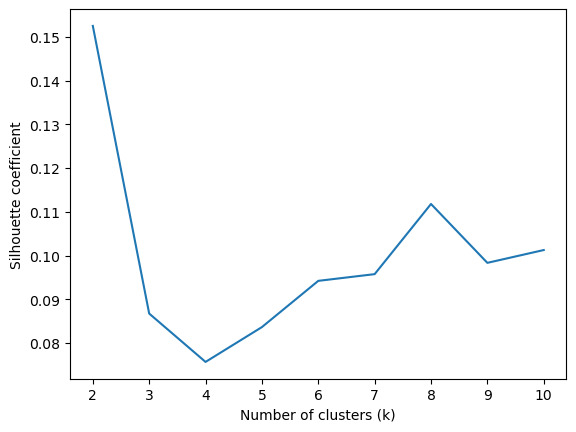

In [23]:
silhouette_plot(data, 100)

In [9]:
kmeans_pp(data, 5, 10)

(array([[ 0.26724121,  0.29051851, -0.13049428, ..., -0.03649398,
         -0.0163563 ,  0.29773315],
        [-0.11154987, -0.11183308, -0.06204181, ..., -0.10318672,
         -0.22971289,  0.13692306],
        [ 0.47202499,  0.3315117 ,  0.19567616, ...,  0.18415747,
          0.21623085,  0.22101361],
        [-0.07739365, -0.19743239, -0.26970131, ..., -0.19231931,
          0.07500892,  0.18649749],
        [-0.23255197, -0.09005632,  0.09137848, ..., -0.44305674,
         -0.06855837,  0.05151326]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
        2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 4, 0,
        0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
        2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 

In [29]:
def bisecting_kmeans(data, s, maxIter):
    # Initialise tree T to contain a single (root) vertex with entire dataset D
    T = [data]
    n_clusters = 1
    
    while n_clusters < s:
        # Select a leaf node (cluster) L in T that has the largest sum of square distance SUM(dist(X, Y )**2), X,Y element of L
        max_distance = -1
        for i in range(len(T)):
            cluster = T[i]
            if len(cluster) == 1:
                continue
            distance = np.sum((cluster - np.mean(cluster, axis=0))**2)
            if distance > max_distance:
                max_distance = distance
                max_cluster = cluster
        
        # Split L into 2 clusters L1, L2 using k-means algorithm
        centeroids, labels = kmeans(max_cluster, 2, maxIter)
        L1 = max_cluster[labels == 0]
        L2 = max_cluster[labels == 1]
        
        # Add L1, L2 as children of L in T
        T.remove(max_cluster)
        T.append(L1)
        T.append(L2)
        n_clusters += 1
        
    # Return the leaf clusters
    return T

In [30]:
bisecting_kmeans(data, 5, 10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15060\847473861.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  T.remove(max_cluster)


[array([[-0.29165  , -0.43165  ,  0.26492  , ..., -0.12855  , -0.39263  ,
         -0.34656  ],
        [-0.03124  , -0.042739 ,  0.41829  , ..., -0.38802  ,  0.059089 ,
         -0.49847  ],
        [-0.88559  ,  0.10536  ,  0.087979 , ..., -0.068767 , -0.094712 ,
          0.22113  ],
        ...,
        [-0.43023  , -0.40977  ,  0.23061  , ..., -0.46335  , -0.56202  ,
         -0.35875  ],
        [-0.14323  , -0.31758  , -0.39174  , ..., -0.56286  , -0.58964  ,
          0.25269  ],
        [-0.58577  , -0.37071  , -0.12452  , ..., -0.0054729, -0.84361  ,
          0.087304 ]]),
 array([[ 0.17562 ,  0.52065 ,  0.048306, ...,  0.011838, -0.30493 ,
          0.22435 ],
        [ 0.27217 ,  0.36681 , -0.029187, ..., -0.2169  ,  0.068996,
         -0.27725 ],
        [ 0.28618 , -0.022226, -0.26812 , ..., -0.2886  , -0.063536,
          0.28123 ],
        ...,
        [ 0.044475, -0.10751 ,  0.41886 , ...,  0.5499  , -0.60257 ,
          0.44069 ],
        [ 0.49033 ,  0.32863 ,  0.28

In [ ]:
import matplotlib.pyplot as plt

def silhouette_plot(data, closest):
    """
    Create a silhouette plot for the k-means clustering algorithm.
    
    Args:
    data: numpy array, shape (n_samples, n_features)
        The data to cluster.
    closest: numpy array, shape (n_samples,)
        The indices of the clusters each data point belongs to.
    """
    n = data.shape[0]
    k = len(np.unique(closest))
    
    if k == 1:
        print("Silhouette plot cannot be created for a single cluster.")
        return
    
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        # Compute a(x)
        cluster = closest[i]
        members = np.where(closest == cluster)[0]
        distances = np.linalg.norm(data[i] - data[members], axis=1)
        a[i] = np.mean(distances)
        
        # Compute b(x)
        other_clusters = [j for j in range(k) if j != cluster]
        b_values = np.zeros(len(other_clusters))
        for idx, c in enumerate(other_clusters):
            members = np.where(closest == c)[0]
            distances = np.linalg.norm(data[i] - data[members], axis=1)
            if len(distances) == 0:
                b_values[idx] = np.inf
            else:
                b_values[idx] = np.mean(distances)
        b[i] = np.min(b_values)
    
    s = (b - a) / np.maximum(a, b)
    s[np.isnan(s)] = 0.0
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, n + (k + 1) * 10])
    
    y_lower = 10
    for i in range(k):
        members = np.where(closest == i)[0]
        ci_size = len(members)
        ci_s = s[members]
        ci_s.sort()
        y_upper = y_lower + ci_size
        
        color = plt.cm.Spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ci_s, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * ci_size, str(i))
        y_lower = y_upper + 10
        
        # Compute average silhouette score for cluster i
        avg_s = np.mean(ci_s)
        ax.axvline(x=avg_s, color="red", linestyle="--")
        ax.text(avg_s + 0.02, y_lower - 0.5 * ci_size, "{:.2f}".format(avg_s))
    
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=0, color="black", linestyle="-")
    
    plt.show()
